### Puzzle

Find all 3-digit numbers so that the number is equal to the sum of the factorial of its digits.

In [2]:
%matplotlib inline

import re
import time
import statistics
from math import factorial as fact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(fact(2))
print(fact(3))
print(fact(4))

2
6
24


$10^{2}a+10b+10c=a!+b!+c!$

In [3]:
number = 123

In [4]:
num_list = [ int(num) for num in str(number)]

In [5]:
sum(num_list)

6

In [6]:
fact_sum = [int(num) for num in str(number)]

In [7]:
fact_sum

[1, 2, 3]

In [8]:
sum(fact_sum)

6

#### Timer decorator

In [10]:
start = time.time()

In [11]:
end = time.time()

In [12]:
end - start

0.22150516510009766

In [143]:
def timeit(method):
    def timing(*args, **kwargs):
        timings = []
        print("Running this 1000 loops, for benchmarking")
        
        for i in range(1000):  
            start = time.time()
            result = method(*args, **kwargs)
            end = time.time()
            
            timings.append(end-start)
        
        average = np.average(timings)
        std_dev = statistics.stdev(timings)
        print("{:.2f} ms ± {:.3f} ms average time taken per loop (mean ± std. dev. to run 1000 loops)"\
              .format(average*1000, std_dev*1000))
        return(result)
    return(timing)

#### Solution 1: Regular for loop

In [144]:
list_behind = []

In [145]:
@timeit
def benchmarking(_range):
    for i in _range:
        fact_sum = [fact(int(num)) for num in str(i)]
        if i == sum(fact_sum):
            list_behind.append(i)
        else:
            pass

In [146]:
benchmarking(range(100,999))

Running this 1000 loops, for benchmarking
1.55 ms ± 0.346 ms average time taken per loop (mean ± std. dev. to run 1000 loops)


#### Solution 2: List Comprehension

In [147]:
%timeit [num for num in range(100, 999) if (sum([fact(int(i)) for i in str(num)]) == num)]

1.61 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Solution 3: List comprehension modified version

In [148]:
%timeit [(z, y, x) for z in range(1, 10) for y in range(10) for x in range(10)  if 100*z+10*y+x == fact(z) + fact(y) + fact(x)]

524 µs ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Print a list

In [26]:
docs = ["hello", "world", "there"]

#### Non-pythonic way to do it

In [30]:
for i in range(len(docs)):
    print(docs[i])

hello
world
there


#### Printing just the values in a list

In [29]:
for doc in docs:
    print(doc)

hello
world
there


#### Printing values using `enumerate`

In [32]:
for doc in enumerate(docs):
    print(doc)

(0, 'hello')
(1, 'world')
(2, 'there')


### Reading a text file and creating histogram for the count of words

In [33]:
# !wget https://github.com/pandas-dev/pandas/blob/master/README.md > pandas_readme.txt

--2018-08-13 11:53:05--  https://github.com/pandas-dev/pandas/blob/master/README.md
Resolving github.com... 192.30.253.113, 192.30.253.112
Connecting to github.com|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'README.md.1'

README.md.1             [  <=>               ]  22.67K  79.0KB/s    in 0.3s    

2018-08-13 11:53:06 (79.0 KB/s) - 'README.md.1' saved [150257]



In [37]:
!cat README.md | head -2

<div align="center">
  <img src="https://github.com/pandas-dev/pandas/blob/master/doc/logo/pandas_logo.png"><br>


In [126]:
with open('./readme_pandas_unclean.md', 'r') as file:
    pandas_readme = file.read()

#### Removing special characters

In [128]:
type(pandas_readme)

str

* Removing html tags

In [129]:
pandas_readme = re.sub(r'<[^>]*>', '', pandas_readme)

* Removing all the characters and keeping only words

In [130]:
pandas_readme = re.sub(r'\W|[0-9]', ' ',pandas_readme)

In [131]:
pandas_readme = pandas_readme.split()

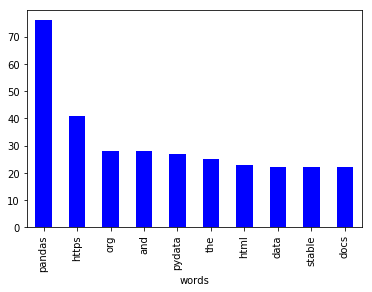

In [134]:
pandas_readme = pd.DataFrame(pandas_readme, columns=['words'])
pandas_readme['indexes'] = pandas_readme.index.value_counts()

pandas_readme.groupby('words')['indexes'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.show()

#### Working on the cleaner version

In [59]:
with open('./readme_pandas.txt', 'r') as file:
    pandas_readme_clean = file.readlines()

In [76]:
pandas_readme_clean = [re.sub(r'\n|\/|\(|\)|\:|\,|[0-9]|\#|\.|\“|\”|\!|\?', '', text) for text in pandas_readme_clean]

In [79]:
pandas_readme_clean = ' '.join(pandas_readme_clean)

In [81]:
pandas_wc = pandas_readme_clean.split()

In [93]:
pandas_wc = pd.DataFrame(pandas_wc, columns=['words'])
pandas_wc['indexes'] = pandas_wc.index.value_counts()

In [102]:
pandas_wc.groupby('words')['indexes'].count().sort_values(ascending=False).head(10)

words
and       26
the       25
to        19
data      17
for       13
in        13
or        12
on        12
pandas    11
can       11
Name: indexes, dtype: int64

In [103]:
plotting_words = pandas_wc.groupby('words')['indexes'].count().sort_values(ascending=False).head(10)

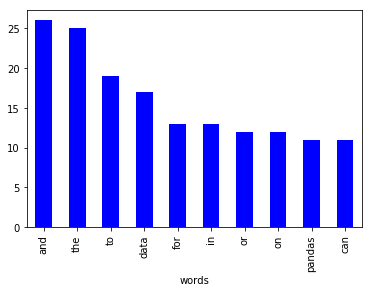

In [110]:
plotting_words.plot(kind='bar', color='blue')
plt.show()

### Simple and Compound Objects

### Lambda, `map`, `filter`

In [150]:
_range = range(100,999)

In [151]:
_range

range(100, 999)

In [187]:
final_value = []

@timeit
def filter_map_solution(_range):
    final_value = [_val[0] for _val in filter(lambda z: z[0] == z[1], \
                   [(num, sum([int(_num) \
                               for _num in \
                               map(lambda x: fact(int(x)), str(num))])) \
                    for num in _range])]

In [188]:
filter_map_solution(_range)

Running this 1000 loops, for benchmarking
2.86 ms ± 0.807 ms average time taken per loop (mean ± std. dev. to run 1000 loops)
